<a href="https://colab.research.google.com/github/antfolk/BMEN35_2023/blob/main/Session2/BMEN35_Ex6_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## knn (k-nearest neighbour)

In this notebook we will get to know the k-nearest neigbour (knn) algorithm for classification. We will use a famous old dataset, the Iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set), to illustrate the algorithm. We will start by importing some of the libraries we need and load the data.

Sidebar on variable naming of your data. X is a matrix (because uppercase letters are used), y is a vector (because lowercase letters are used).

In [2]:
import numpy as np # Always good to have...
from sklearn.datasets import load_iris # We are going to use the Iris dataset
from sklearn.model_selection import train_test_split  # Split them data
from sklearn.preprocessing import StandardScaler # Here we will also "scale" our data

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.5, random_state=0) # Also note annoying change of variable naming convention. You will find all kinds of conventions...


(75, 4)

It is generally good practise to "scale/normalise" your data before use (this depends on the algorithm though, see p. 24 in the book on input normalisation). There are many possibilites here, but in this example we will make use of the `StandardScaler()` function. This function removes the means and scales to unit variance for each feature. (Check this for yourself, you should know how to do it, hint: np.mean() and np.var()). Also think about why we do it after the dataset is split into test and train.

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # We use the train data to find the scaling parameters
X_test = scaler.transform(X_test) # And use these scaling parameters on the test set

The knn algorithm goes through the whole training dataset and find the n examples that are "closest" to the test example. The class associated with training example that is "closest" to test example is the output of the algorithm. So we can use a for - loop to go through all the examples. Lets first try to classify the X = [1 1 1 1] using k = 1. As a distance metric we will use the Euclidian distance.

In [18]:
X = np.array([5.6 ,2.7, 4.2, 1.3]) # This is our X to be tested
neighbors = 1 # How many neigbors to use in the algoritm (the k in knn)
dist_class = np.zeros([X_train.shape[0],2]) # Allocate a variable where we store the distance metric and which class

# First we compute the Euclidean distance between our X and all the datapoints in the training dataset
for j in range(X_train.shape[0]): # For every sample in X_train
  d = (np.sqrt(np.sum(np.square(X - X_train[j,:])))) # Euclidean distance
  dist_class[j,:] = [d, y_train[j]] # Store euclidean distance in first column and class in second column

Now we have a matrix with Euclidian distance in the first column and class in the second column. What we want to do now is to sort the matrix according to the distance values (shortest first). Luckily, there is just the thing to do this available in numpy (argsort()). So we sort the distance and class array/matrix using the following.

In [19]:
dist_class = dist_class[dist_class[:,0].argsort()] # This function has a somewhat complicated syntax...

Now since we use n = 1 the first value in the second column will be our answer.

In [20]:
y_hat = dist_class[0,1]
print(y_hat)

2.0


The answer is that the class is 2. What does this actually mean? In the iris object there is an array named target_names. Lets print them and select the appropriate one. (Note we cast the output to int to be able to index the iris.target_names)



In [21]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [22]:
print(iris.target_names[int(y_hat)])

virginica


Change the values of X to [5.6 2.7 4.2 1.3] and check what you get.

This is all good but we might want to do this for the entire X_test matrix (75 rows with 4 columns of data). To do this we can use another for-loop.

In [ ]:
from scipy import stats # In order to compute the "mode" a.k.a. most occuring value

neighbor = 3 # We will also use 3 neighbors
dist_class = np.zeros([X_test.shape[0],2]) # Allocate space for distance and class
y_hat = np.zeros([X_test.shape[0],]) # Allocate space for prediction
for i in range(X_test.shape[0]): # For every sample in X_test
  for j in range(X_train.shape[0]): # For every sample in X_train
    d = (np.sqrt(np.sum(np.square(X_test[i,:] - X_train[j,:])))) # Euclidean distance
    dist_class[j,:] = [d, y_train[j]] # Store euclidean distance in first column and class in second column


  dist_class = dist_class[dist_class[:,0].argsort()] # Sort the array in ascending order based on Euclidean distance , closest first, as before
  y_hat[i] = stats.mode(dist_class[0:neighbor,1])[0] # Extract the most common value (mode in stats speak) of the array of k nearest neighbors



accuracy = np.sum(y_hat==y_test)/y_test.size # Calculate the classification accuracy
print("The accuracy, using {:d} neighbors is {:f}".format(neighbor, accuracy))


In [27]:
dist_class[0:neighbor]

array([[0.36209849, 1.        ],
       [0.40808637, 1.        ],
       [0.49798587, 1.        ],
       [0.63390862, 2.        ],
       [0.64794542, 1.        ],
       [0.77347873, 2.        ],
       [0.79174878, 2.        ],
       [0.82758498, 1.        ],
       [0.95355282, 2.        ],
       [0.96197701, 2.        ]])

What would you change to compute the classification error instead??

Now we can also check what number of neighbours gives us the best accuracy.

C:\Users\sasyn\AppData\Local\Temp\ipykernel_24036\2372627165.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_hat[i] = stats.mode(dist_class[0:neighbor,1])[0] # Extract the most common value (mode in stats speak) of the array of k nearest neighbors
C:\Users\sasyn\AppData\Local\Temp\ipykernel_24036\2372627165.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated,

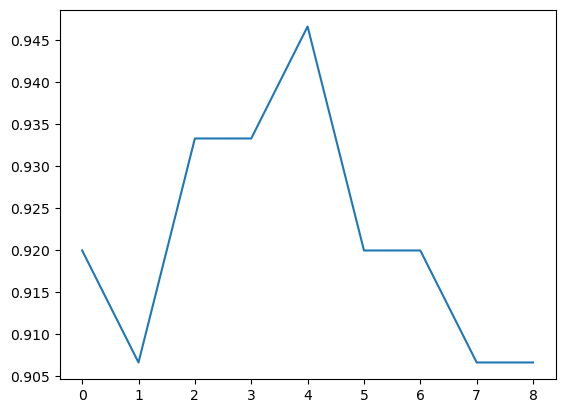

In [23]:
from scipy import stats # In order to compute the "mode" a.k.a. most occuring value
from sklearn.metrics import accuracy_score # How well did we do...
import matplotlib.pyplot as plt

accuracy = np.zeros(11)
for neighbor in range(1,11):
  dist_class = np.zeros([X_test.shape[0],2]) # Allocate space for distance and class
  y_hat = np.zeros([X_test.shape[0],]) # Allocate space for prediction
  for i in range(X_test.shape[0]): # For every sample in X_test
    for j in range(X_train.shape[0]): # For every sample in X_train
      d = (np.sqrt(np.sum(np.square(X_test[i,:] - X_train[j,:])))) # Euclidean distance
      dist_class[j,:] = [d, y_train[j]] # Store euclidean distance in first column and class in second column


    dist_class = dist_class[dist_class[:,0].argsort()] # Sort the array in ascending order based on Euclidean distance , closest first, as before
    y_hat[i] = stats.mode(dist_class[0:neighbor,1])[0] # Extract the most common value (mode in stats speak) of the array of k nearest neighbors

  accuracy[neighbor] = accuracy_score(y_test, y_hat) # There is of course a method already available to compute this


plt.plot(accuracy[1:10])
plt.show()


That is all good! Next thing to do is to try knn regression. To do this we only need to modify one single little thing in the code from before. Think about what you would change!

We will make up our own data for this using a function from sklearn (more about sklearn in the next notebook)

In [28]:
from sklearn.datasets import make_regression

X,y = make_regression(1000,4, random_state = 1) # We make 1000 examples with 4 features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1) # Split the dataset into training and testing
# We scale the data like in previous example
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.metrics import mean_squared_error, r2_score # Regression metrics, yay!!

# We copy the code from a previous cell
neighbor = 3 # We will also use 3 neighbors
dist_class = np.zeros([X_test.shape[0],2]) # Allocate space for distance and class
y_hat = np.zeros([X_test.shape[0],]) # Allocate space for prediction
for i in range(X_test.shape[0]): # For every sample in X_test
  for j in range(X_train.shape[0]): # For every sample in X_train
    d = (np.sqrt(np.sum(np.square(X_test[i,:] - X_train[j,:])))) # Euclidean distance
    dist_class[j,:] = [d, y_train[j]] # Store euclidean distance in first column and class in second column


  dist_class = dist_class[dist_class[:,0].argsort()] # Sort the array in ascending order based on Euclidean distance , closest first, as before
  y_hat[i] = np.mean(dist_class[0:neighbor,1]) # This is where the change is! We use the mean of the k neighbors

mse = np.mean((y_hat-y_test)**2) # Mean squared error
mae = np.mean(np.abs(y_hat-y_test)) # Mean absolute error
r2 =  1 - (np.sum((y_test-y_hat)**2))/(np.sum((y_test - np.mean(y_test))**2))# R2 or coefficient or determination
print("The Mean Squared Error is {:f} and the R2 (Coefficient of determination) is {:f}, using {:d} neighbors".format(mse, r2, neighbor))


The Mean Squared Error is 885.830939 and the R2 (Coefficient of determination) is 0.955739, using 3 neighbors


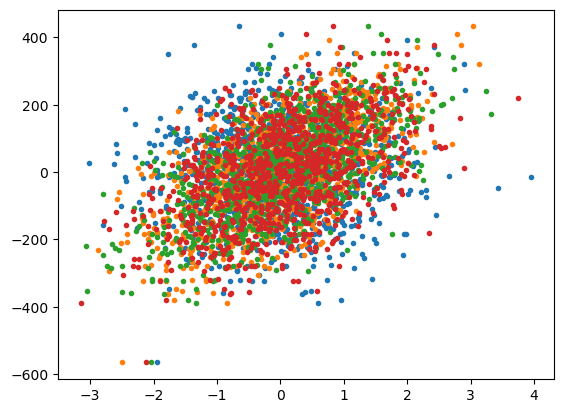

In [35]:
plt.plot(X,y,'.')

You have finished this tutorial

## The end